# 1.import necessary Files

In [1]:
import pandas as pd #For data preprocessing
import numpy as np #For numerical Operations
import matplotlib.pyplot as plt #For Visualization
import seaborn as sns #for statistical Visiualization
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split   # For splitting the Data
import category_encoders as ce #To encode the labels
from sklearn.svm import SVC #To import Naive Bayes Model
from sklearn.metrics import accuracy_score  #To check accuracy of Model
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,classification_report #To check type of error we got
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# 2.Import Dataset 

In [2]:
salarydata_train=pd.read_csv('SalaryData_Train(1).csv')
salarydata_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
salarydata_test=pd.read_csv('SalaryData_Test(1).csv')
salarydata_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# 3.Data Understanding

### 3.1Exploratory Data Analysis

In [4]:
salarydata_train.shape , salarydata_test.shape

((30161, 14), (15060, 14))

In [5]:
salarydata_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
salarydata_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [7]:
salarydata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
salarydata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
salarydata_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [10]:
salarydata_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [11]:
# checking null values & ? Values or special characters in both datasets
salarydata_train.isin(['?']).sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
salarydata_test.isin(['?']).sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
print(salarydata_train[0:5])

   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1           

# Let's explore categorical Variables

In [14]:
# Find Categorical Variables
categorical = [var for var in salarydata_train.columns if salarydata_train[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)


There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [15]:
# View categorical variables
salarydata_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


#### There is Total 9 Categorical Variables in Training data

##### from that 8 Categorical variables are workclass,education,maritalstatus,occupation,relationship,race,sex,native

##### Salary is Target variable.

#### Explore problems within categorical variables


In [16]:
# checking missing values or NA values in categorical variables
salarydata_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

#### We can see that there is no missing values presented in categorical variables.i will confirm this further

#### checking frequency counts of values in categorical variables

In [17]:
for var in categorical:
    print(salarydata_train[var].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [18]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(salarydata_train[var].value_counts()/np.float(len(salarydata_train)))


 Private             0.738868
 Self-emp-not-inc    0.082855
 Local-gov           0.068532
 State-gov           0.042406
 Self-emp-inc        0.035609
 Federal-gov         0.031266
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326249
 Some-college    0.221379
 Bachelors       0.167236
 Masters         0.053944
 Assoc-voc       0.043334
 11th            0.034747
 Assoc-acdm      0.033421
 10th            0.027187
 7th-8th         0.018468
 Prof-school     0.017970
 9th             0.015086
 12th            0.012500
 Doctorate       0.012433
 5th-6th         0.009549
 1st-4th         0.005006
 Preschool       0.001492
Name: education, dtype: float64
 Married-civ-spouse       0.466331
 Never-married            0.322436
 Divorced                 0.139717
 Separated                0.031133
 Widowed                  0.027420
 Married-spouse-absent    0.012267
 Married-AF-spouse        0.000696
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13388

#####  Now, we can see that there are several variables like workclass, occupation and native_country which contain missing values. Generally, the missing values are coded as NaN and python will detect them with the usual command of df.isnull().sum().

##### But, in this case the missing values are coded as ?. Python fail to detect these as missing values because it do not consider ? as missing values. So, I have to replace ? with NaN so that Python can detect these missing values.

#### I will explore these variables and replace ? with NaN.




In [19]:
# checking labels in workclass variables
salarydata_train.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [20]:
# Check value counts of each labes of workclass
salarydata_train.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

## Explore occupation variables 

In [21]:
# check labels in accupation variables

salarydata_train.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [22]:
salarydata_train.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

### Exploring native_country variables

In [23]:
salarydata_train.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [24]:
salarydata_train.native.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

## Number of labels: cardinality¶


#### The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.3

##### check for cardinality in categorical variables


In [25]:
for var in categorical:
    print(var,'contains',len(salarydata_train[var].unique()),'labels')

workclass contains 7 labels
education contains 16 labels
maritalstatus contains 7 labels
occupation contains 14 labels
relationship contains 6 labels
race contains 5 labels
sex contains 2 labels
native contains 40 labels
Salary contains 2 labels


#### We can see that native_country column contains relatively large number of labels as compared to other columns. I will check for cardinality after train-test split.

# Exploring Numerical variables 

In [26]:
# Finding Numerical Variables
numerical = [var for var in salarydata_train.columns if salarydata_train[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are:',numerical)

There are 5 numerical variables

The numerical variables are: ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [27]:
# View Numerical Variables
salarydata_train[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


#### There are 5 Numerical Variables
##### These are age,educationno,capitalgain,capitalloss,hoursperweek.
### These numerical variables are of "Discrete "data type

# Exploring Numerical Variables 

##### Checking Missing values in Numerical Variables

In [28]:
salarydata_train[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

In [29]:
##### There is no missing values presented in Numerical Variables

In [30]:
salarydata_train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [31]:
salarydata_test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [32]:
pd.crosstab(salarydata_train['occupation'],salarydata_train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,3223,498
Armed-Forces,8,1
Craft-repair,3122,908
Exec-managerial,2055,1937
Farming-fishing,874,115
Handlers-cleaners,1267,83
Machine-op-inspct,1720,245
Other-service,3080,132
Priv-house-serv,142,1


## Visualizing the comparison between Target variable & other variables

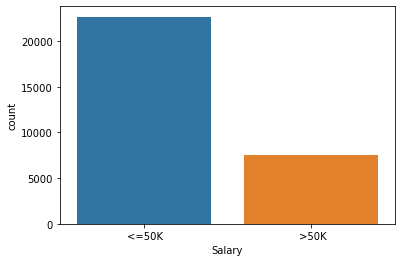

In [33]:
sns.countplot(x='Salary',data=salarydata_train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()

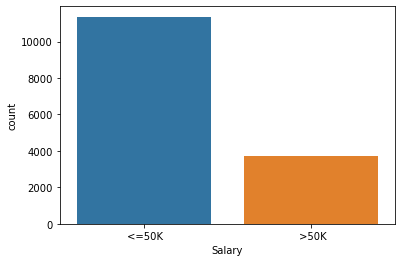

In [34]:
sns.countplot(x='Salary',data=salarydata_test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()

<AxesSubplot:xlabel='occupation', ylabel='workclass'>

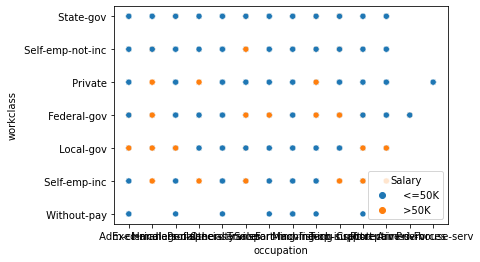

In [35]:
sns.scatterplot(salarydata_train['occupation'],salarydata_train['workclass'],hue=salarydata_train['Salary']
)

<AxesSubplot:xlabel='education'>

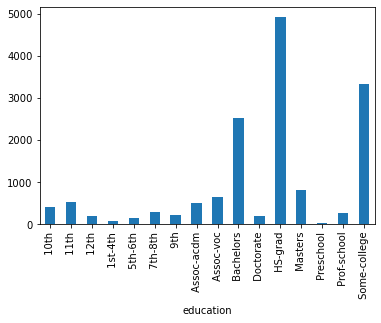

In [36]:
pd.crosstab(salarydata_train['Salary'],salarydata_train['education']).mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

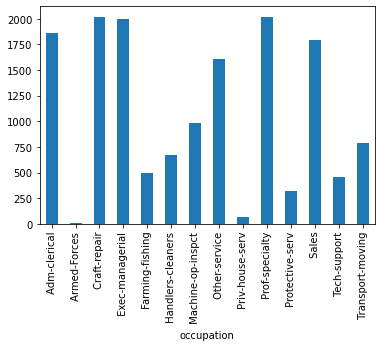

In [37]:
pd.crosstab(salarydata_train['Salary'],salarydata_train['occupation']).mean().plot(kind='bar')

<AxesSubplot:xlabel='workclass'>

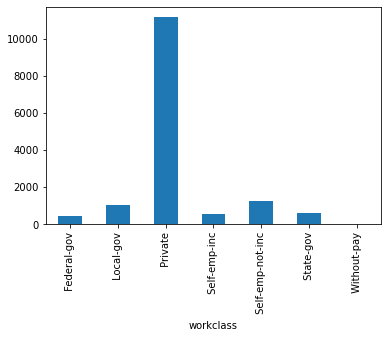

In [38]:
pd.crosstab(salarydata_train['Salary'],salarydata_train['workclass']).mean().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

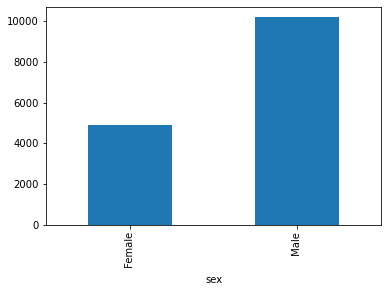

In [39]:
pd.crosstab(salarydata_train['Salary'],salarydata_train['sex']).mean().plot(kind='bar')

<AxesSubplot:xlabel='relationship'>

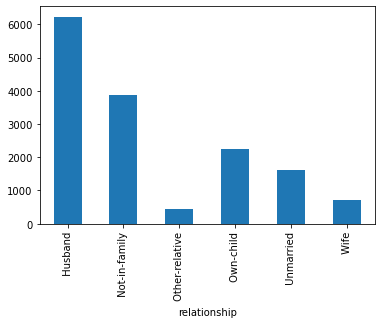

In [40]:
pd.crosstab(salarydata_train['Salary'],salarydata_train['relationship']).mean().plot(kind='bar')

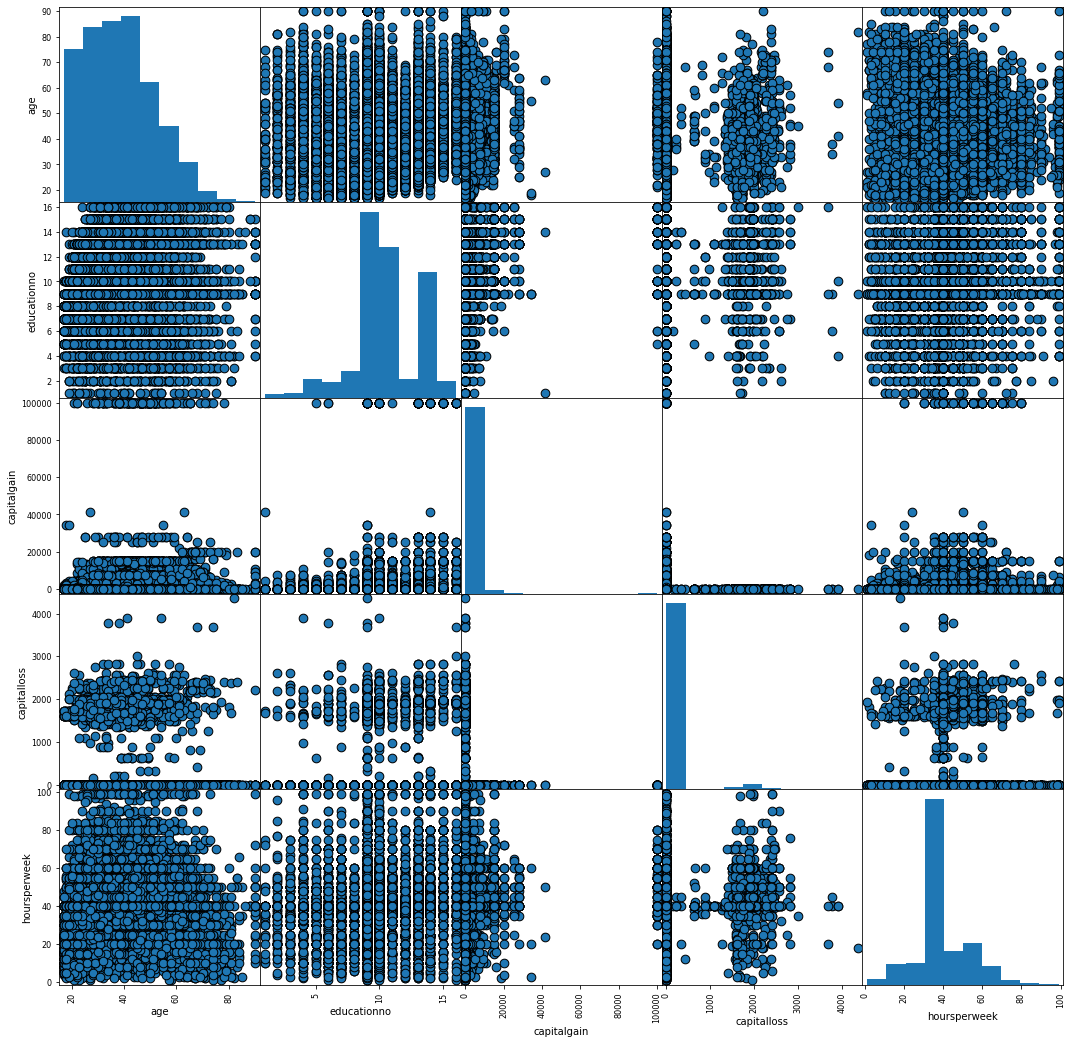

In [41]:
# scatter matrix to observe relationship between every colomn attribute. 
pd.plotting.scatter_matrix(salarydata_train,figsize=[18,18],diagonal='hist',alpha=1,s=300,marker='.'
                          ,edgecolor="black")
plt.show()

### Label Encoding for categorical data

In [42]:
string_columns=["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [43]:
LB=LabelEncoder()
for i in string_columns:
        salarydata_train[i]=LB.fit_transform(salarydata_train[i])
        salarydata_test[i]=LB.fit_transform(salarydata_test[i])

In [44]:
salarydata_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [45]:
salarydata_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


# Declaring Fearure Vector & target Vector Variables 

In [46]:
X=salarydata_train.drop(['Salary'],axis=1)

y=salarydata_train['Salary']

## Splitting Data into Training & Testing Data

In [47]:
X_train,X_test,y_Train,y_Test = train_test_split(X,y,test_size=0.2,random_state=0)

In [48]:
X_train.shape ,X_test.shape

((24128, 13), (6033, 13))

## Scalling the Data to normalize the Data(Normalization)

In [49]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [50]:
X_train=norm_func(X_train)
X_Test=norm_func(X_test)

In [51]:
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
26840,0.520548,0.333333,1.000000,0.600000,0.333333,0.692308,0.0,1.00,1.0,0.00000,0.000000,0.397959,0.948718
23346,0.123288,0.333333,0.600000,0.800000,0.666667,0.692308,0.6,0.25,0.0,0.00000,0.000000,0.397959,0.948718
27598,0.191781,0.333333,0.600000,0.800000,1.000000,0.538462,0.2,1.00,0.0,0.00000,0.000000,0.295918,0.948718
15646,0.136986,0.333333,0.600000,0.800000,0.666667,0.846154,0.6,1.00,1.0,0.00000,0.000000,0.397959,0.948718
7455,0.315068,0.333333,1.000000,0.600000,0.333333,0.538462,0.0,1.00,1.0,0.00000,0.393899,0.397959,0.948718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.671233,0.166667,0.666667,1.000000,0.000000,0.692308,0.2,1.00,0.0,0.03273,0.000000,0.397959,0.948718
19648,0.123288,0.333333,0.733333,0.533333,0.333333,0.000000,1.0,1.00,0.0,0.00000,0.000000,0.397959,0.948718
9845,0.452055,0.333333,0.600000,0.800000,0.000000,0.846154,0.2,1.00,1.0,0.00000,0.000000,0.448980,0.948718
10799,0.438356,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.00,1.0,0.00000,0.000000,0.602041,0.948718


In [52]:
y_Train

26840      >50K
23346     <=50K
27598     <=50K
15646     <=50K
7455      <=50K
          ...  
13123     <=50K
19648     <=50K
9845      <=50K
10799      >50K
2732      <=50K
Name: Salary, Length: 24128, dtype: object

### Model Building

#### Using Kernal=Linear 

In [53]:
Linear_Model=SVC(kernel="linear",random_state=42,gamma=0.1,C=1.0)
Linear_Model.fit(X_train,y_Train)

SVC(gamma=0.1, kernel='linear', random_state=42)

In [54]:
Linear_Test_Pred=Linear_Model.predict(X_Test)

In [55]:
np.mean(Linear_Test_Pred==y_Test) #Checking Accuracy of Predicted Model

0.8088844687551798

#### Using Kernal=poly

In [56]:
Poly_Model=SVC(kernel="poly",random_state=42,gamma=0.1,C=1.0)
Poly_Model.fit(X_train,y_Train)
Poly_Test_Model=Poly_Model.predict(X_Test)

In [57]:
np.mean(Poly_Test_Model==y_Test) #Checking Accuracy of Predicted Model

0.8178352395159953

#### Using Kernal=RBF 

In [58]:
Rbf_Model=SVC(kernel="rbf",random_state=42,gamma=0.1,C=1.0)
Rbf_Model.fit(X_train,y_Train)
Rbf_Test_Predict=Rbf_Model.predict(X_Test)

In [59]:
np.mean(Rbf_Test_Predict==y_Test) #Checking Accuracy Of Predicted model

0.827780540361346

## Condusion Matrix

##### A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

In [60]:
confusion_matrix(y_Test,y_pred=Linear_Test_Pred)

array([[4431,  128],
       [1025,  449]], dtype=int64)

In [61]:
confusion_matrix(y_Test,y_pred=Poly_Test_Model)

array([[4351,  208],
       [ 891,  583]], dtype=int64)

In [62]:
confusion_matrix(y_Test,y_pred=Rbf_Test_Predict)

array([[4320,  239],
       [ 800,  674]], dtype=int64)

## Plotting Confusion Matrix

## Confusion Matrix

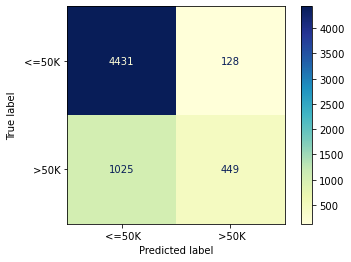

In [63]:
plot_confusion_matrix(Linear_Model,X_Test,y_Test,cmap="YlGnBu")

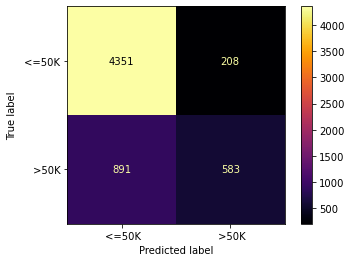

In [64]:
plot_confusion_matrix(Poly_Model,X_Test,y_Test,cmap="inferno")

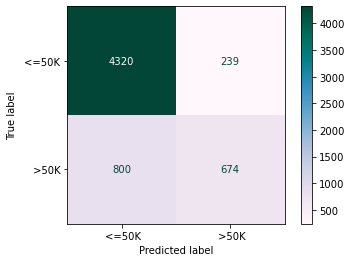

In [65]:
plot_confusion_matrix(Rbf_Model,X_Test,y_Test,cmap="PuBuGn")

In [66]:
print(confusion_matrix(y_Test,Linear_Test_Pred))
print('\n')
print(classification_report(y_Test,Linear_Test_Pred))

[[4431  128]
 [1025  449]]


              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      4559
        >50K       0.78      0.30      0.44      1474

    accuracy                           0.81      6033
   macro avg       0.80      0.64      0.66      6033
weighted avg       0.80      0.81      0.78      6033



In [67]:
print(confusion_matrix(y_Test,Linear_Test_Pred))
print('\n')
print(classification_report(y_Test,Poly_Test_Model))

[[4431  128]
 [1025  449]]


              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.89      4559
        >50K       0.74      0.40      0.51      1474

    accuracy                           0.82      6033
   macro avg       0.78      0.67      0.70      6033
weighted avg       0.81      0.82      0.80      6033



In [68]:
print(confusion_matrix(y_Test,Linear_Test_Pred))
print('\n')
print(classification_report(y_Test,Rbf_Test_Predict))

[[4431  128]
 [1025  449]]


              precision    recall  f1-score   support

       <=50K       0.84      0.95      0.89      4559
        >50K       0.74      0.46      0.56      1474

    accuracy                           0.83      6033
   macro avg       0.79      0.70      0.73      6033
weighted avg       0.82      0.83      0.81      6033

